In [80]:
import pandas as pd

df = pd.read_csv("business-licences-hackathon.csv", sep=";")
df.head()

/opt/miniconda3/envs/532/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,BusinessType,...,Street,City,Province,Country,PostalCode,LocalArea,NumberofEmployees,FeePaid,ExtractDate,Geom
0,14,2180123,14-160030,0,Golden Trim Enterprises Inc,Floorhaus,Issued,2013-12-05T19:08:53-05:00,2014-12-31,Wholesale Dealer w/ Anc. Retail,...,W 3RD AV,Vancouver,BC,CA,V5Y 1G1,Mount Pleasant,4.0,262.0,2019-07-21T16:49:13-04:00,"{""type"": ""Point"", ""coordinates"": [-123.1098925..."
1,14,2180373,14-160220,0,Tamton Networking Inc,Tam Ton Training,Issued,2014-02-26T16:08:59-05:00,2014-12-31,Instruction,...,W PENDER ST,Vancouver,BC,CA,V6B 6N9,Downtown,0.0,130.0,2019-07-21T16:49:13-04:00,"{""type"": ""Point"", ""coordinates"": [-123.1067518..."
2,14,2180374,14-160221,0,Jack W Chow Insurance Services Ltd,NaN,Issued,2013-12-06T11:57:32-05:00,2014-12-31,Office,...,E PENDER ST,Vancouver,BC,CA,V6A 1S9,Downtown,10.0,130.0,2019-07-21T16:49:13-04:00,"{""type"": ""Point"", ""coordinates"": [-123.1040791..."
3,14,2180382,14-160226,0,Time Education Inc,NaN,Cancelled,NaN,NaN,Educational,...,GRANVILLE ST,Vancouver,BC,CA,V6M 4J7,Kerrisdale,2.0,51.0,2019-07-21T16:49:13-04:00,"{""type"": ""Point"", ""coordinates"": [-123.1401383..."
4,13,2180556,13-449866,0,(Maiko Sato),Nankurunaisa Education Services,Issued,2013-12-17T16:18:45-05:00,2013-12-31,Referral Services,...,NaN,Vancouver,BC,CA,NaN,Riley Park,1.0,62.0,2019-07-21T16:49:13-04:00,NaN


In [81]:
print(df.columns)

Index(['FOLDERYEAR', 'LicenceRSN', 'LicenceNumber', 'LicenceRevisionNumber',
       'BusinessName', 'BusinessTradeName', 'Status', 'IssuedDate',
       'ExpiredDate', 'BusinessType', 'BusinessSubType', 'Unit', 'UnitType',
       'House', 'Street', 'City', 'Province', 'Country', 'PostalCode',
       'LocalArea', 'NumberofEmployees', 'FeePaid', 'ExtractDate', 'Geom'],
      dtype='object')


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569027 entries, 0 to 569026
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FOLDERYEAR             569027 non-null  int64  
 1   LicenceRSN             569027 non-null  int64  
 2   LicenceNumber          569027 non-null  object 
 3   LicenceRevisionNumber  569027 non-null  int64  
 4   BusinessName           550020 non-null  object 
 5   BusinessTradeName      230039 non-null  object 
 6   Status                 569027 non-null  object 
 7   IssuedDate             468813 non-null  object 
 8   ExpiredDate            468490 non-null  object 
 9   BusinessType           569027 non-null  object 
 10  BusinessSubType        307658 non-null  object 
 11  Unit                   147603 non-null  object 
 12  UnitType               147543 non-null  object 
 13  House                  313356 non-null  object 
 14  Street                 313371 non-nu

In [83]:
df.groupby(by="Status")["BusinessName"].count()

Status
Cancelled                 9486
Gone Out of Business     39383
Inactive                 12378
Issued                  436548
Pending                  52225
Name: BusinessName, dtype: int64

In [84]:
df.groupby(by="BusinessName")["NumberofEmployees"].std().sort_values().dropna()

BusinessName
!Exotics BySIYTHE Corporation             0.000000e+00
Imperial Autobody Ltd                     0.000000e+00
Imperial Carpets & Rugs Ltd               0.000000e+00
Imperial Construction Ltd                 0.000000e+00
Imperial Ginseng Products Inc             0.000000e+00
                                              ...     
Amazon Canada Fulfillment Services Inc    2.640926e+03
(Devret Bosch)                            2.865551e+03
K & T Foods Ltd                           1.504038e+05
(Sergey Lipnitskiy)                       3.745225e+05
Shifeon Enterprises Ltd                   1.906663e+09
Name: NumberofEmployees, Length: 84111, dtype: float64

In [85]:
counts_of_records = df.groupby(by="BusinessName")["FOLDERYEAR"].count().sort_values()
counts_of_records

BusinessName
Kingsway Moulding & Floors Ltd             1
0746652 BC Ltd                             1
Chun Chia Wu (Chun Wu)                     1
0745070 BC Ltd                             1
0744920 BC Ltd                             1
                                        ... 
City of Vancouver                        516
Greater Vancouver Floating Home Co-Op    519
Advanced Parking Systems Ltd             678
Starbucks Coffee Canada Inc              824
Imperial Parking Canada Corporation      947
Name: FOLDERYEAR, Length: 93557, dtype: int64

In [86]:
num_of_employees = df.groupby(by="NumberofEmployees")["NumberofEmployees"].count().sort_values()
num_of_employees

NumberofEmployees
134.0          1
183.0          1
269.0          1
1251.0         1
1250.0         1
           ...  
4.0        22361
3.0        30309
2.0        53557
1.0       103307
0.0       240561
Name: NumberofEmployees, Length: 362, dtype: int64

In [87]:
import matplotlib.pyplot as plt


(0.0, 100.0)

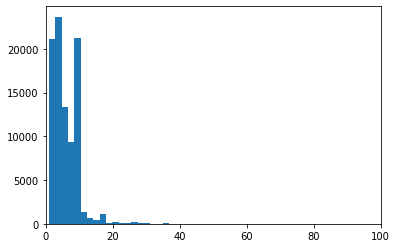

In [88]:
plt.hist(counts_of_records, bins = 500);
plt.xlim([0, 100])

(0.0, 12.0)

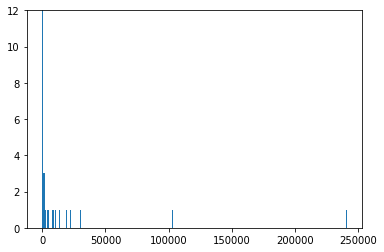

In [89]:
plt.hist(num_of_employees, bins = 500);
plt.ylim([0, 12])

In [90]:
df_no_nan = df.dropna(subset=['BusinessName'])
contain_brackets = df_no_nan[df_no_nan['BusinessName'].str.contains('(', regex=False)]

In [91]:
len(contain_brackets.BusinessName.unique())

35050

In [92]:
contain_brackets

,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,BusinessType,...,Street,City,Province,Country,PostalCode,LocalArea,NumberofEmployees,FeePaid,ExtractDate,Geom
4,13,2180556,13-449866,0,(Maiko Sato),Nankurunaisa Education Services,Issued,2013-12-17T16:18:45-05:00,2013-12-31,Referral Services,...,NaN,Vancouver,BC,CA,NaN,Riley Park,1.0,62.0,2019-07-21T16:49:13-04:00,NaN
7,14,2180593,14-160347,0,Wei Hsuen (Kathy) Chou & Chi Hao Chen,My Fluffy Friend's Pet Shop,Issued,2013-12-06T16:56:09-05:00,2014-12-31,Animal Services,...,CYPRESS ST,Vancouver,BC,CA,V6J 5J1,Kitsilano,0.0,130.0,2019-07-21T16:49:13-04:00,"{""type"": ""Point"", ""coordinates"": [-123.1473952..."
10,14,2180667,14-127846,1,Yee Ha Lau (Yee Lau),NaN,Issued,2013-12-06T18:28:29-05:00,2014-12-31,Multiple Dwelling,...,NaN,Vancouver,BC,CA,NaN,Fairview,0.0,10.0,2019-07-21T16:49:13-04:00,NaN
11,13,2180702,13-449988,0,(Ermilo Martinez Juarez),Erma Renovations,Issued,2013-12-06T19:27:46-05:00,2013-12-31,Contractor,...,NaN,Vancouver,BC,CA,NaN,West End,1.0,63.0,2019-07-21T16:49:13-04:00,NaN
12,13,2181387,13-450197,0,(Christopher Wall),NaN,Pending,NaN,NaN,Apartment House,...,YUKON ST,Vancouver,BC,CA,V5Y 3P8,Mount Pleasant,0.0,NaN,2019-07-21T16:49:13-04:00,"{""type"": ""Point"", ""coordinates"": [-123.1126274..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569016,21,3729701,21-147185,0,Comfort Upholstery (2003) Ltd,NaN,Issued,2020-12-03T14:32:26-05:00,2021-12-31,Repair/ Service/Maintenance,...,E KENT AV SOUTH,Vancouver,BC,CA,V5X 0B2,Sunset,2.0,155.0,2021-02-22T03:08:55-05:00,"{""type"": ""Point"", ""coordinates"": [-123.0929115..."
569018,21,3729703,21-147187,0,(Julio Perez Vertti),Bikes and Blades Rentals,Pending,NaN,NaN,Repair/ Service/Maintenance,...,ROBSON ST,Vancouver,BC,CA,V6G 1C1,West End,8.0,155.0,2021-02-22T03:08:55-05:00,"{""type"": ""Point"", ""coordinates"": [-123.1305640..."
569021,21,3729710,21-147194,0,Amir Q Shatertoussi (Amir Shatertoussi),Toussi Jewellery,Issued,2020-12-20T20:18:10-05:00,2021-12-31,Repair/ Service/Maintenance,...,GRANVILLE ST,Vancouver,BC,CA,V6Z 1K9,Downtown,1.0,155.0,2021-02-22T03:08:55-05:00,"{""type"": ""Point"", ""coordinates"": [-123.1205796..."
569022,21,3729711,21-147195,0,(Neil-Hung Tsao),K8 Strings,Pending,NaN,NaN,Repair/ Service/Maintenance,...,RENFREW ST,Vancouver,BC,CA,V5K 4C9,Hastings-Sunrise,1.0,155.0,2021-02-22T03:08:55-05:00,"{""type"": ""Point"", ""coordinates"": [-123.0446858..."


In [93]:
df_no_nan = df.dropna(subset=['PostalCode'])
df_no_nan.PostalCode

0         V5Y 1G1
1         V6B 6N9
2         V6A 1S9
3         V6M 4J7
5         V6A 2S7
           ...   
569020    V5N 5X1
569021    V6Z 1K9
569022    V5K 4C9
569024    V5T 3G8
569026    V6R 2G4
Name: PostalCode, Length: 308835, dtype: object

In [94]:
incorrect_postal_codes = df_no_nan[~df_no_nan['PostalCode'].str.contains("^[A-Za-z]\d[A-Za-z][ -]*\d[A-Za-z]\d")]['PostalCode']
incorrect_postal_codes

637            V5Z
1492        V6P 65
3379      V6JJ 1H6
3620       V6B 4NB
3790       V6C 2XB
            ...   
567070     V3W 26Y
567163     V6E 2YE
568339    V5N 1 V9
568487     V74 1K8
568800     V6C 3LZ
Name: PostalCode, Length: 740, dtype: object

In [95]:
#df_no_nan['PostalCode'].str.replace(" ","")

In [96]:
series = df_no_nan['PostalCode'].str.replace(" ","")
correct_postal_codes = series.where(series.str.contains("^[A-Za-z]\d[A-Za-z][ -]*\d[A-Za-z]\d")).dropna()
correct_postal_codes

0         V5Y1G1
1         V6B6N9
2         V6A1S9
3         V6M4J7
5         V6A2S7
           ...  
569020    V5N5X1
569021    V6Z1K9
569022    V5K4C9
569024    V5T3G8
569026    V6R2G4
Name: PostalCode, Length: 308117, dtype: object

In [97]:
correct_postal_codes.index

Int64Index([     0,      1,      2,      3,      5,      6,      7,      8,
                 9,     12,
            ...
            569012, 569015, 569016, 569017, 569018, 569020, 569021, 569022,
            569024, 569026],
           dtype='int64', length=308117)

In [102]:
df_no_nan.groupby(by="Province")["Province"].count()

Province
AB                      13
BC                  308396
British Columbia        63
CA                       9
CT                       5
FL                       7
MA                       4
NJ                       1
NY                       3
OH                       1
ON                     117
On                       1
Ontario                  2
QC                       5
TX                       3
VA                       2
WA                      12
`                        2
bc                      30
Name: Province, dtype: int64

In [ ]:
df_no_nan[""]

In [59]:
#df_no_nan[~df_no_nan['PostalCode'].str.contains("^[A-Za-z]\d[A-Za-z][ -]*\d[A-Za-z]\d")]['PostalCode']

In [105]:
import altair as alt
#alt.data_transformers.disable_max_rows()

alt.Chart(df[""]).mark_line().encode(
    y='NumberofEmployees',
    x='FOLDERYEAR'
)

KeyboardInterrupt: 